# Interactive Dashboard

## Instructions to get the interactive dashboard working:
### 1. Please install the following packages before running this dashboard:
```
!pip install --upgrade mplfinance 
!conda install -c conda-forge ipywidgets -y
!conda install pandas numpy matplotlib scipy seaborn -y
```

### 2. Once installed, "Restart Kernel and Run all cells" to see the results. 
Re-run the kernel every time you open the notebook as well. Please be patient as it takes some time for all the files to load.

### Note: If the widget is not working:
#### 1. Try running this in `jupyter notebook` instead of `jupyter lab`
#### 2. Install node.js, then run this command `jupyter labextension install @jupyter-widgets/jupyterlab-manager`, and re-run jupyter lab

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [2]:
%%capture
%run candlestick
%run volume_traded.py
%run stock_corr.py
%run distribution_of_returns.py
%run dividend_history.py
%run capm.py

In [3]:
stocks_df =  pd.read_csv('./final_project.csv')
stock_list = np.sort(np.unique(stocks_df.stock_name + "("  + stocks_df.stock + ")"))

In [4]:
candlestick_output = widgets.Output()
volume_traded_output = widgets.Output()
returns_output = widgets.Output()

def dropdown_stock_eventhandler(change):
    s = change['new']
    stock = s[s.find("(")+1:s.find(")")]
    
    candlestick_output.clear_output()
    with candlestick_output:
        plot_candlestick_chart(stocks_df, stock)
        
    volume_traded_output.clear_output()    
    with volume_traded_output:
        plot_vol_traded(stocks_df, stock).show()
    
    returns_output.clear_output()    
    with returns_output:
        plot_returns(stocks_df, stock).show()

dropdown_stock = widgets.Dropdown(options = stock_list)        
dropdown_stock.observe(dropdown_stock_eventhandler, names='value')

### Please Select A Stock

In [5]:
display(dropdown_stock)

Dropdown(options=('3M(MMM)', 'AT&T (T)', 'Alcoa(AA)', 'American Express (AXP)', 'Bank of America(BAC)', 'Boein…

## Candlestick Plot for Stocks

In [6]:
# Load the first stock by default
dropdown_stock_eventhandler({'new': stock_list[0]})

display(candlestick_output)

Output()

## Visualizations of volume traded/percentage difference in trading volume week to week

In [7]:
display(volume_traded_output)

Output()

## Distribution of Returns

In [8]:
display(returns_output)

Output()

In [9]:
corr_output = widgets.Output()
stock_1 = stock_list[0]
stock_2 = stock_list[0]

def dropdown_stock_corr_1_eventhandler(change):
    s = change['new']
    global stock_1
    stock_1 = s[s.find("(")+1:s.find(")")]
    corr_output.clear_output()    
    with corr_output:
        plot_corr(stock_1, stock_2).show()

dropdown_stock_1 = widgets.Dropdown(options = stock_list)
dropdown_stock_1.observe(dropdown_stock_corr_1_eventhandler, names='value')

def dropdown_stock_corr_2_eventhandler(change):
    s = change['new']
    global stock_2
    stock_2 = s[s.find("(")+1:s.find(")")]
    corr_output.clear_output()    
    with corr_output:
        plot_corr(stock_1, stock_2).show()
    

dropdown_stock_2 = widgets.Dropdown(options = stock_list)
dropdown_stock_2.observe(dropdown_stock_corr_2_eventhandler, names='value')

## Percentage Returns Correlation Between any Two Stocks

#### Select any 2 different stocks to see a correlation

In [10]:
display(dropdown_stock_1)
display(dropdown_stock_2)

Dropdown(options=('3M(MMM)', 'AT&T (T)', 'Alcoa(AA)', 'American Express (AXP)', 'Bank of America(BAC)', 'Boein…

Dropdown(options=('3M(MMM)', 'AT&T (T)', 'Alcoa(AA)', 'American Express (AXP)', 'Bank of America(BAC)', 'Boein…

In [11]:
display(corr_output)

Output()

## Average Returns

<AxesSubplot:ylabel='Average Percent Return'>

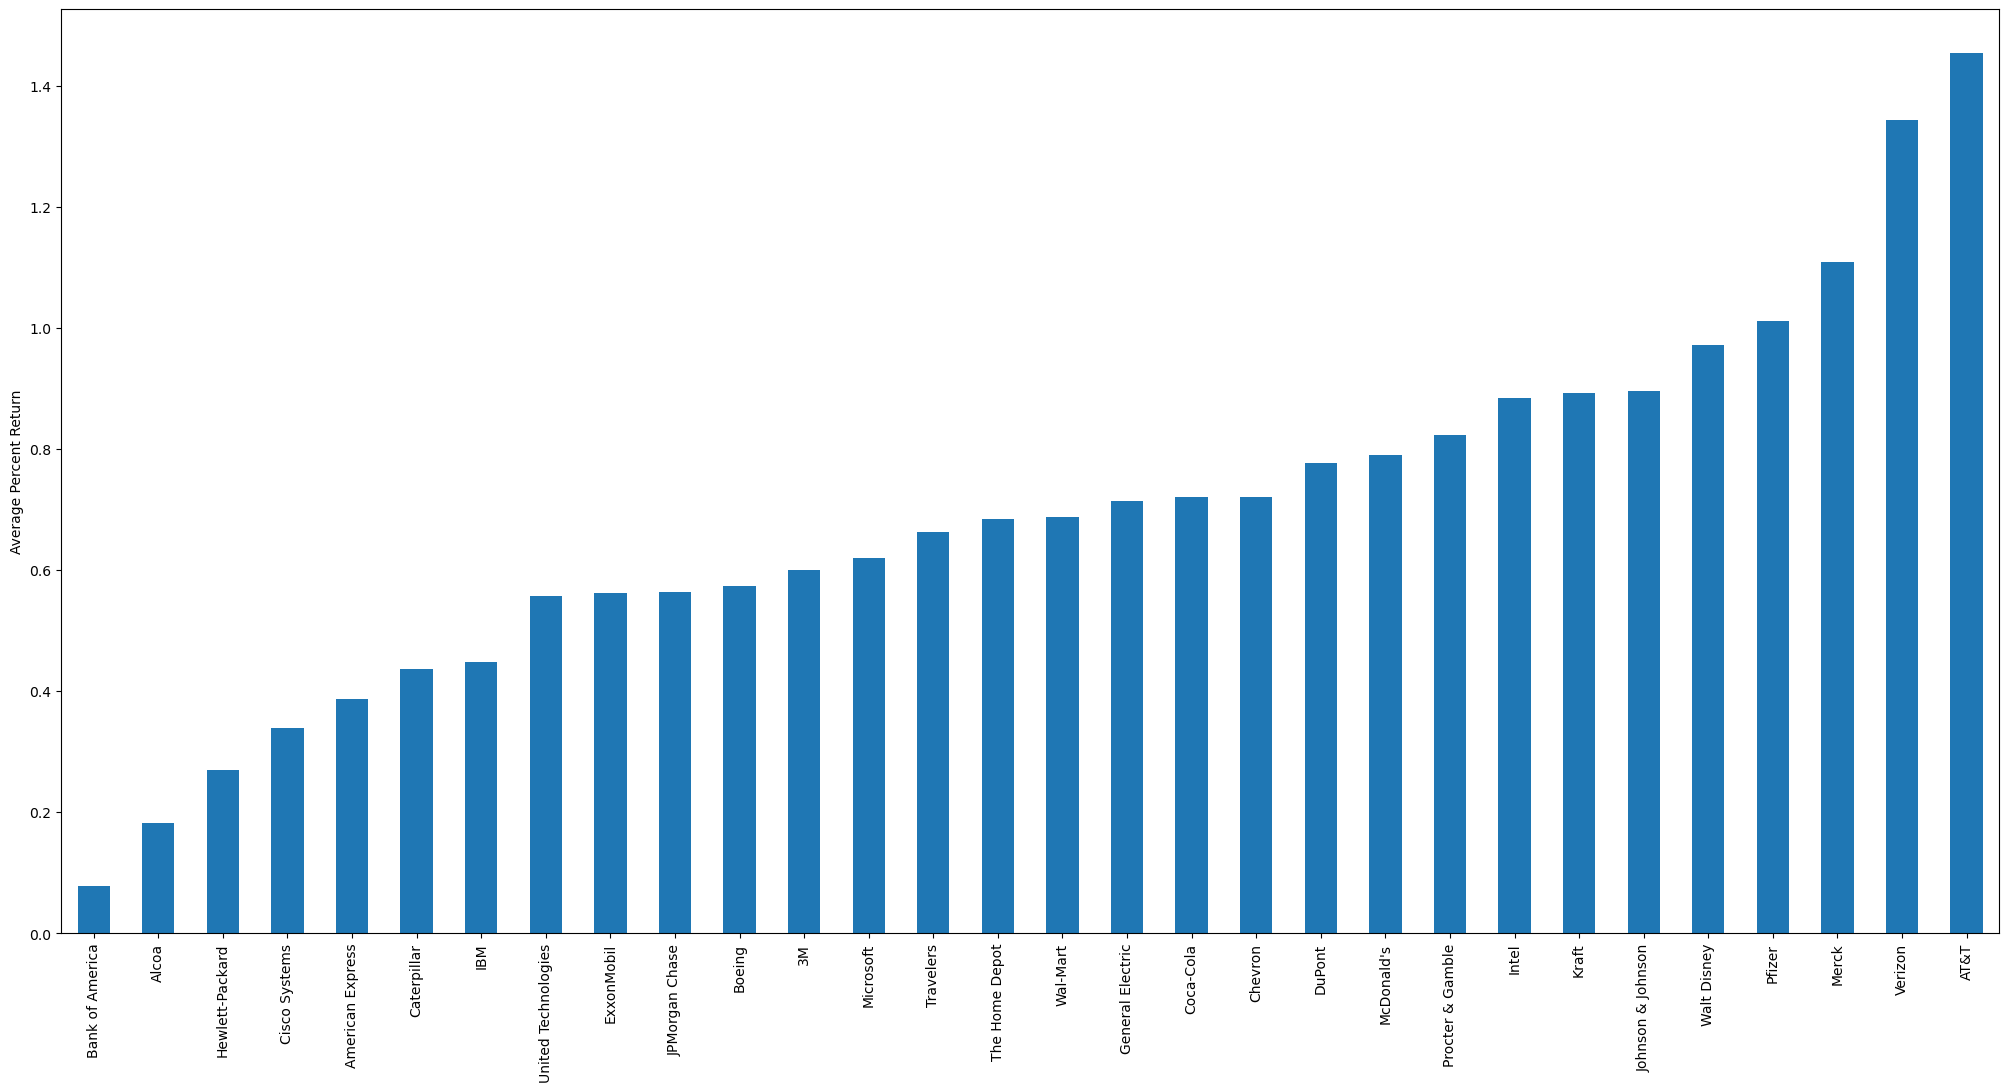

In [12]:
plot_avg_returns()

## Percentage Correlation Between All Stocks

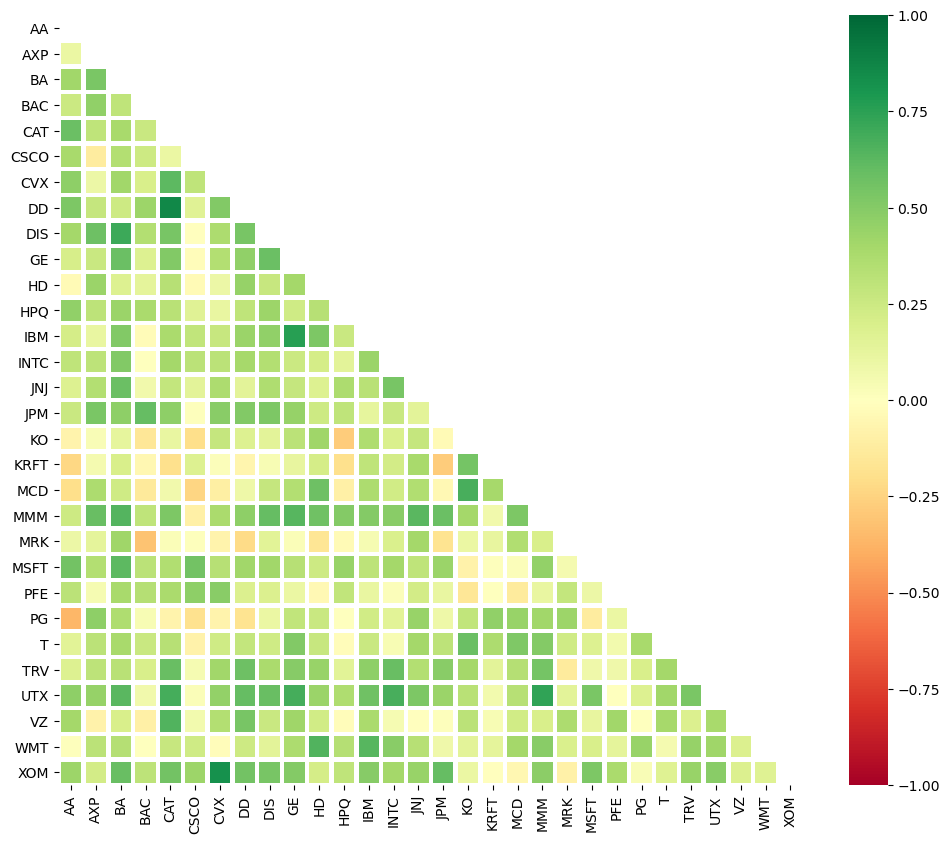

In [13]:
plot_overall_corr()

## CAPM Beta For All Stocks

<AxesSubplot:ylabel='CAPM Beta'>

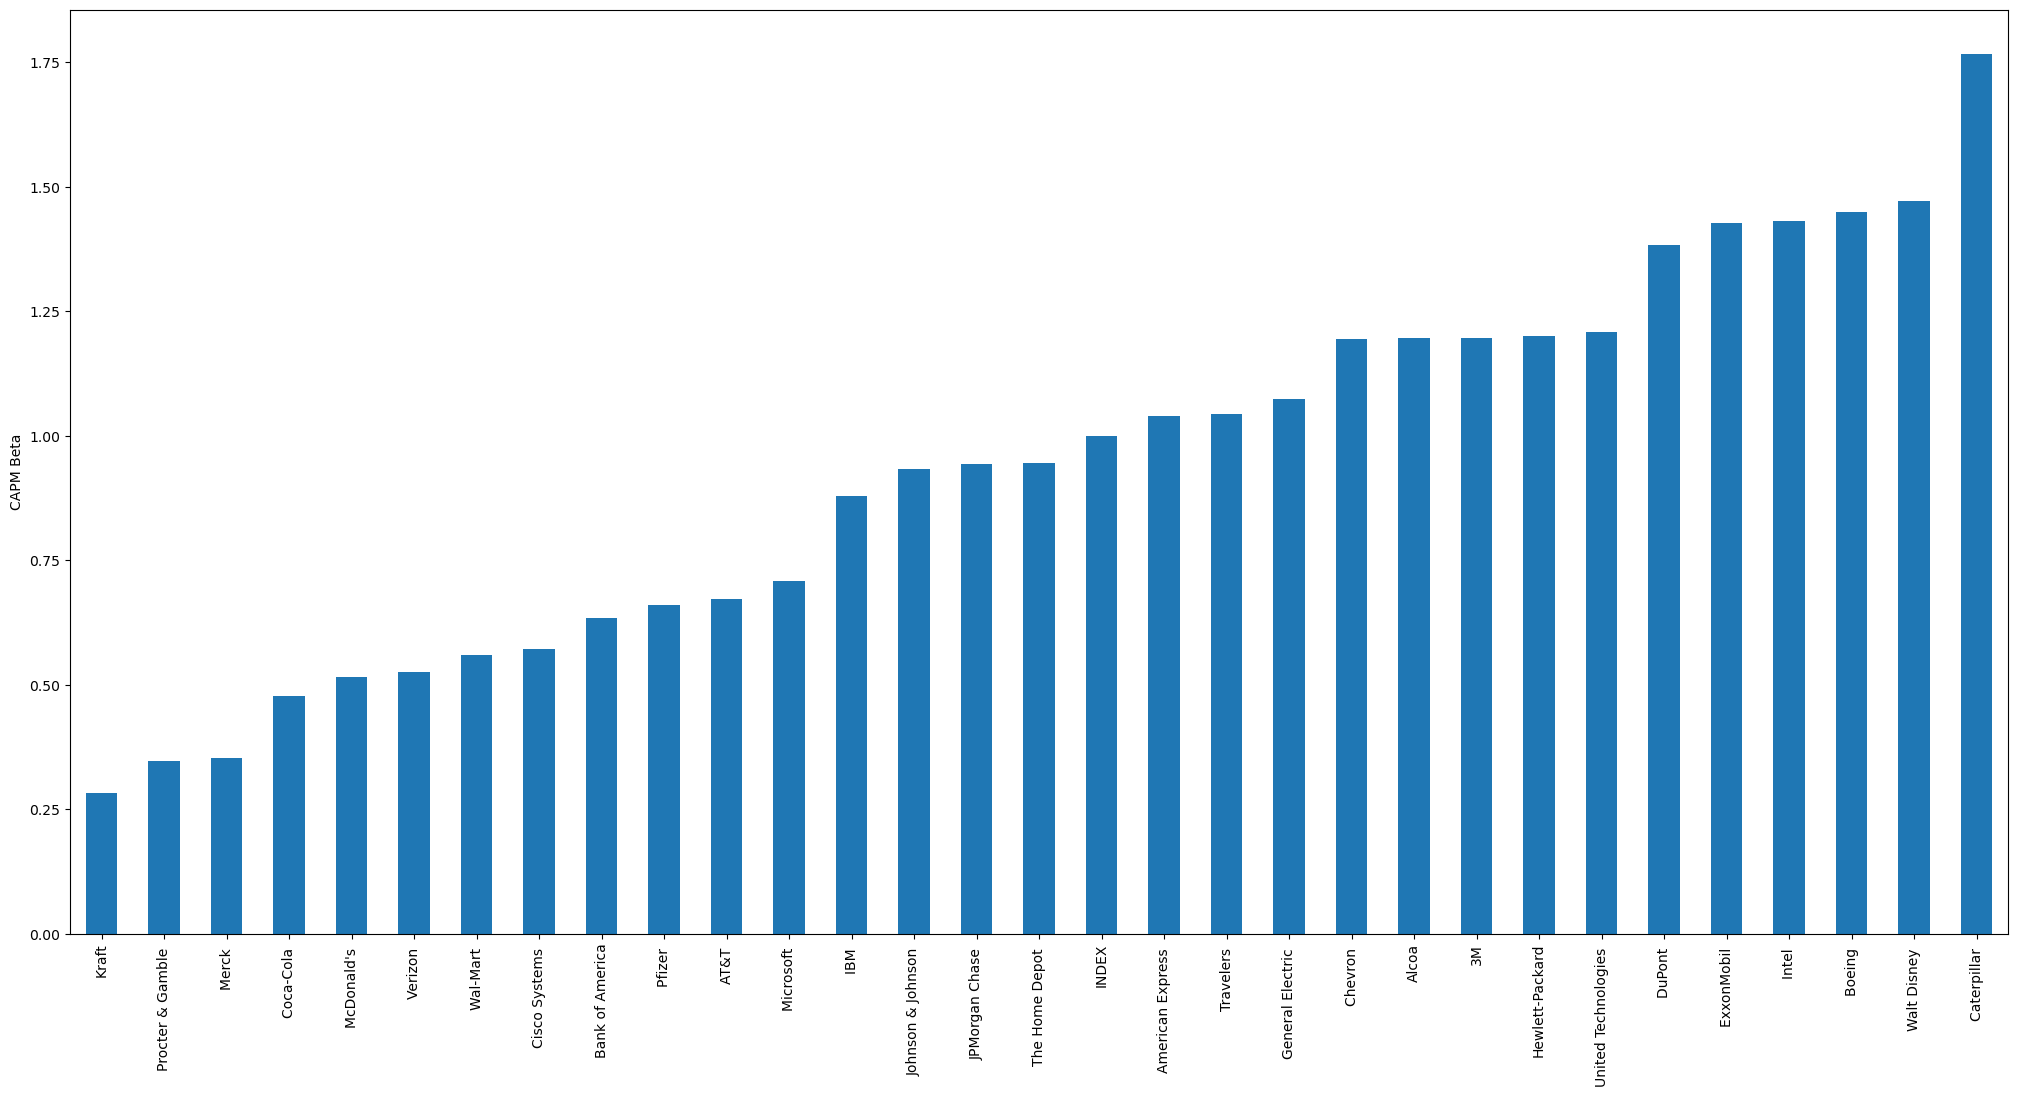

In [14]:
plot_capm_beta(stocks_df)